# 15.0 Portfolio assignment 15
30 min: Train a decision tree to predict the species of a penguin based on their characteristics.
- Split the penguin dataset into a train (70%) and test (30%) set.
- Use the train set to fit a DecisionTreeClassifier. You are free to to choose which columns you want to use as feature variables and you are also free to choose the max_depth of the tree. 
<b>Note</b>: Some machine learning algorithms can not handle missing values. You will either need to 
 - replace missing values (with the mean or most popular value). For replacing missing values you can use .fillna(\<value\>) https://pandas.pydata.org/docs/reference/api/pandas.Series.fillna.html
 - remove rows with missing data.  You can remove rows with missing data with .dropna() https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
- Use your decision tree model to make predictions for both the train and test set.
- Calculate the accuracy for both the train set predictions and test set predictions.
- Is the accurracy different? Did you expect this difference?
- Use the plot_tree_classification function above to create a plot of the decision tree. Take a few minutes to analyse the decision tree. Do you understand the tree?

Optional: Perform the same tasks but try to predict the sex of the pinguin based on the other columns

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

penguins = sns.load_dataset("penguins").dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


## 15.1 Split data

In [2]:
from sklearn.model_selection import train_test_split

# Split dataset into a training (70%) and testing set (30%)
# Based on random 'seed' 42 and equally divides species across both datasets
penguinTrainSet, penguinTestSet = train_test_split(penguins, test_size=0.3, random_state=50, stratify=penguins['species'])
print(penguinTrainSet.shape, penguinTestSet.shape)

(233, 7) (100, 7)


## 15.2 Train model

In [3]:
from sklearn.tree import DecisionTreeClassifier

features= ['bill_length_mm', 'bill_depth_mm']
dt_classification = DecisionTreeClassifier(max_depth = 12) # Increase max_depth to see effect in the plot
dt_classification.fit(penguinTrainSet[features], penguinTrainSet['species'])

DecisionTreeClassifier(max_depth=12)

## 15.3 Evaluate trained model

In [4]:
def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

In [5]:
predictionsOnTrainset = dt_classification.predict(penguinTrainSet[features])
predictionsOnTestset = dt_classification.predict(penguinTestSet[features])

accuracyTrain = calculate_accuracy(predictionsOnTrainset, penguinTrainSet.species)
accuracyTest = calculate_accuracy(predictionsOnTestset, penguinTestSet.species)

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 1.0
Accuracy on test set 0.94


### 15.3.1 Observeringen
- De nauwkeurigheid van de test set is natuurlijk lager. Dit komt omdat de test set misschien afwijkingen kent van de train set kent

## 15.4 Plot DecisionTreeClassifier

In [6]:
from sklearn import tree
import graphviz

def plot_tree_classification(model, features, class_names):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          class_names=class_names,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

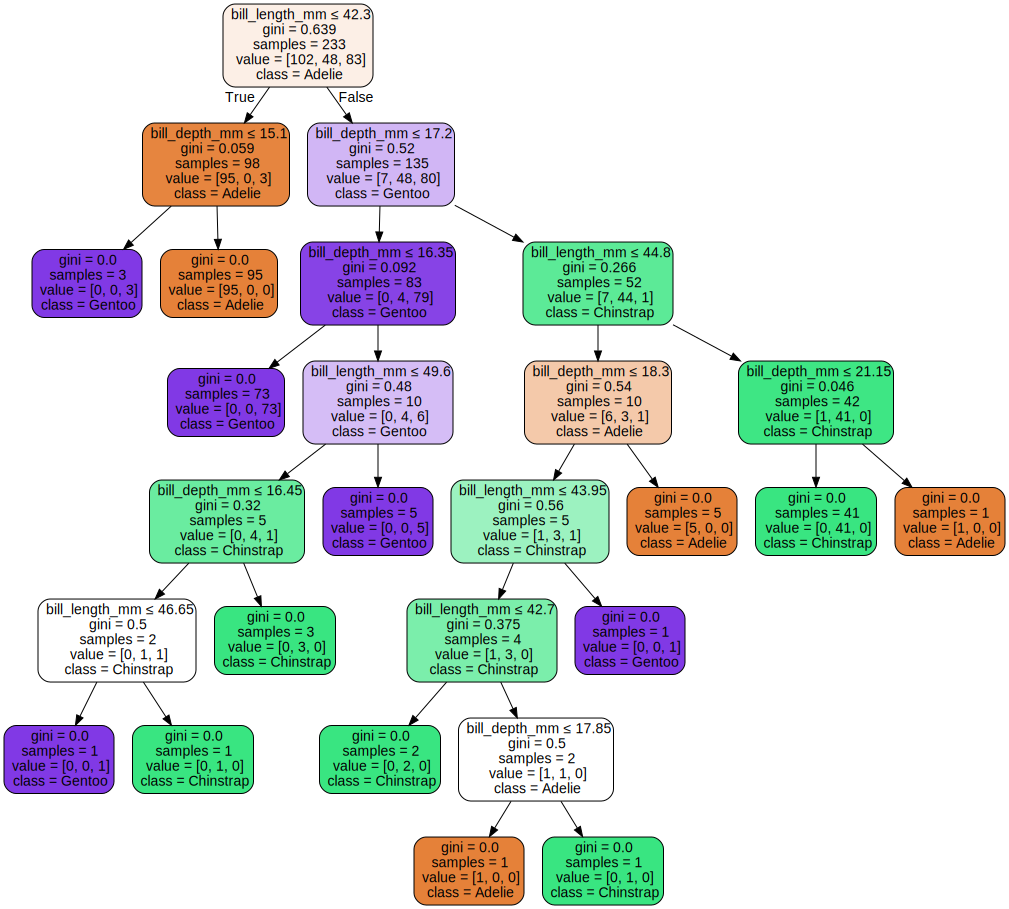

In [7]:
plot_tree_classification(dt_classification, features, np.sort(penguins['species'].unique()))